# Tprofile 2Poly Realistic
Different charges depending on region




**Author:** Filip Ilic  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:59 AM.</small></i>

In [1]:
%%cpp -d
#include <iostream>
#include <fstream>
#include <TProfile2Poly.h>
#include <TProfile2D.h>
#include <TCanvas.h>
#include <TRandom.h>

using namespace std;

 Arguments are defined. 

In [2]:
Int_t numEvents=100000;

In [3]:
int NUM_LS = 8;
TCanvas *c1 = new TCanvas("c1", "moving charge", 900, 400);
TCanvas *c2 = new TCanvas("c2", "Merge Individual moving charge plots", 800, 400);

c1->Divide(NUM_LS, 3);
c2->Divide(3,1);

-------------------- construct reference plot bins ------------------------

In [4]:
auto new_avg = new TProfile2Poly();

auto tot_avg_ls = new TProfile2Poly[NUM_LS];
auto det_avg_ls = new TProfile2Poly[NUM_LS];
auto det_err_ls = new TProfile2Poly[NUM_LS];
auto tot_merge = new TProfile2Poly();
auto det_avg_merge = new TProfile2Poly();
auto det_err_merge = new TProfile2Poly();

float minx = -15;
float maxx = 15;
float miny = -15;
float maxy = 15;
float binsz = 0.5;

for (float i = minx; i < maxx; i += binsz) {
   for (float j = miny; j < maxy; j += binsz) {
     tot_merge->AddBin(i, j, i + binsz, j + binsz);
     for (int l=0; l<NUM_LS; ++l) {
       tot_avg_ls[l].AddBin(i, j, i + binsz, j + binsz);
     }
   }
}

-------------------- construct detector bins ------------------------

In [5]:
auto h2p = new TH2Poly();
auto tp2p = new TProfile2Poly();
ifstream infile;
TString dir = gROOT->GetTutorialDir();
dir.Append("/hist/data/tprofile2poly_tutorial.data");
infile.open(dir.Data());

if (!infile) // Verify that the file was open successfully
{
   std::cerr << dir.Data() << std::endl; // Report error
   std::cerr << "Error code: " << strerror(errno) << std::endl; // Get some info as to why
   return;
}
std::cout << " WE ARE AFTER LOADING DATA " << std::endl;

vector<pair<Double_t, Double_t>> allCoords;
Double_t a, b;
while (infile >> a >> b) {
   pair<Double_t, Double_t> coord(a, b);
   allCoords.push_back(coord);
}

if (allCoords.size() % 3 != 0) {
   cout << "[ERROR] Bad file" << endl;
   return;
}

Double_t x[3], y[3];
for (Int_t i = 0; i < allCoords.size(); i += 3) {
   x[0] = allCoords[i + 0].first;
   y[0] = allCoords[i + 0].second;
   x[1] = allCoords[i + 1].first;
   y[1] = allCoords[i + 1].second;
   x[2] = allCoords[i + 2].first;
   y[2] = allCoords[i + 2].second;

   det_avg_merge->AddBin(3, x, y);
   det_err_merge->AddBin(3, x, y);

   for (int l=0; l<NUM_LS; ++l) {
     det_avg_ls[l].AddBin(3, x, y);
   }
}

std::cout << " WE ARE AFTER ADDING BINS " << std::endl;

 WE ARE AFTER LOADING DATA 
 WE ARE AFTER ADDING BINS 


-------------------- simulate particles ------------------------

In [6]:
TRandom ran;

Moving error

In [7]:
Double_t xoffset1 = 0;
Double_t yoffset1 = 0;
Double_t xoffset2 = 0;
Double_t yoffset2 = 0;

for (int i = 0; i <= NUM_LS-1; ++i) { // LumiSection
  std::cout << "[In Progress] LumiSection " << i << std::endl;
   for (int j = 0; j < numEvents; ++j) {   // Events
      Double_t r1 = ran.Gaus(0, 10);
      Double_t r2 = ran.Gaus(0, 8);
      Double_t rok = ran.Gaus(10, 1);
      Double_t rbad1 = ran.Gaus(8, 5);
      Double_t rbad2 = ran.Gaus(-8, 5);

      Double_t val = rok;

      xoffset1 += 0.00002;
      yoffset1 += 0.00002;

      xoffset2 += 0.00003;
      yoffset2 += 0.00004;

      if (r2 > 3. - yoffset1 && r2 < 8. - yoffset1 &&
          r1 > 1. + xoffset1 && r1 < 5. + xoffset1 ) {
        val -= rbad1;
      }

      if (r2 > -10 + yoffset2 && r2 < -8 + yoffset2 &&
          r1 > -6 + xoffset2 && r1 < 8 + xoffset2 ) {
        val -= rbad2;
      }

      tot_avg_ls[i].Fill(r1, r2, val);
      det_avg_ls[i].Fill(r1, r2, val);
   }

   std::string title;


   c1->cd(i+1);
   title = "Global View: Avg in LS  " + to_string(i);
   tot_avg_ls[i].SetTitle(title.c_str());
   tot_avg_ls[i].SetStats(false);
   tot_avg_ls[i].Draw("COLZ");
   c1->Update();

   c1->cd((i+1)+NUM_LS);
   title = "Detector View: Avg in LS  " + to_string(i);
   det_avg_ls[i].SetTitle(title.c_str());
   det_avg_ls[i].SetStats(false);
   det_avg_ls[i].Draw("COLZ");
   c1->Update();


   c1->cd((i+1)+(NUM_LS*2));
   title = "Detector View: Error in LS  " + to_string(i);
   det_avg_ls[i].SetTitle(title.c_str());
   det_avg_ls[i].SetStats(false);
   det_avg_ls[i].SetContentToError();
   det_avg_ls[i].Draw("COLZ");
   c1->Update();
}

std::vector<TProfile2Poly*> tot_avg_v;
std::vector<TProfile2Poly*> det_avg_v;
for (Int_t t=0; t<NUM_LS; t++){
  tot_avg_v.push_back(&tot_avg_ls[t]);
  det_avg_v.push_back(&det_avg_ls[t]);
}

std::cout << "[In Progress] Merging" << std::endl;

std::string title;

tot_merge->Merge(tot_avg_v);
c2->cd(1);
title = "Total average merge";
tot_merge->SetTitle(title.c_str());
tot_merge->Draw("COLZ");

det_avg_merge->Merge(det_avg_v);
c2->cd(2);
title = "Detector average merge";
det_avg_merge->SetTitle(title.c_str());
det_avg_merge->SetContentToAverage(); // implicit
det_avg_merge->Draw("COLZ");

det_err_merge->Merge(det_avg_v);
c2->cd(3);
title = "Detector error merge";
det_err_merge->SetTitle(title.c_str());
det_err_merge->SetContentToError();
det_err_merge->Draw("COLZ");

[In Progress] LumiSection 0
[In Progress] LumiSection 1
[In Progress] LumiSection 2
[In Progress] LumiSection 3
[In Progress] LumiSection 4
[In Progress] LumiSection 5
[In Progress] LumiSection 6
[In Progress] LumiSection 7
[In Progress] Merging


Draw all canvases 

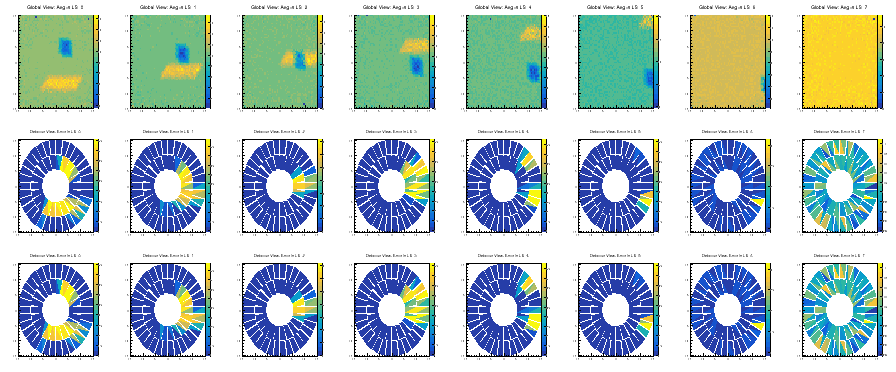

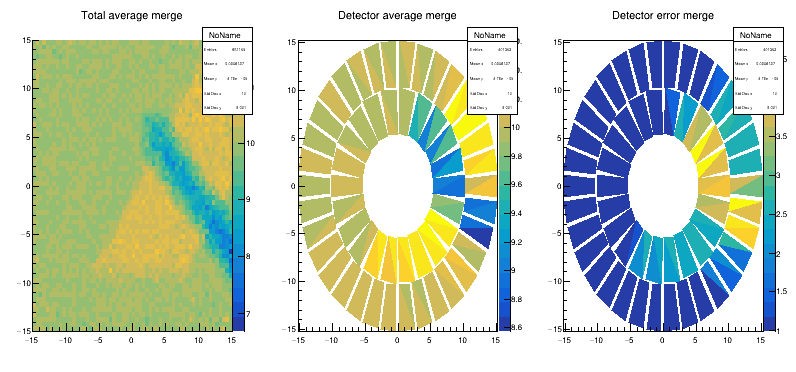

In [8]:
gROOT->GetListOfCanvases()->Draw()